In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
##### Audio Classification Using Machine Learning
#####dataset url https://urbansounddataset.weebly.com/urbansound8k.html

# EDA of Sample Audio

In [29]:
#  Taking 2 audio samples

filename='UrbanSound8K/audio/fold4/7389-1-0-6.wav'
filename1='UrbanSound8K/audio/fold2/100652-3-0-3.wav'

In [30]:
# To listen to audio

import IPython.display as ipd
ipd.Audio(filename)

In [31]:
ipd.Audio(filename1)

### Reading audio file using scipy

In [32]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)
wave_sample_rate1, wave_audio1=wav.read(filename1)

In [33]:
wave_sample_rate

44100

In [34]:
wave_audio

array([[-1985,  2465],
       [-1765,   976],
       [-1083,  -532],
       ...,
       [ -572, -4579],
       [ 1521, -3099],
       [ 2735, -1279]], dtype=int16)

In [35]:
wave_sample_rate1

44100

In [36]:
wave_audio1

array([[-135,  -35],
       [-138,  -37],
       [-112,  -21],
       ...,
       [ 253,  638],
       [ 214,  609],
       [ 180,  553]], dtype=int16)

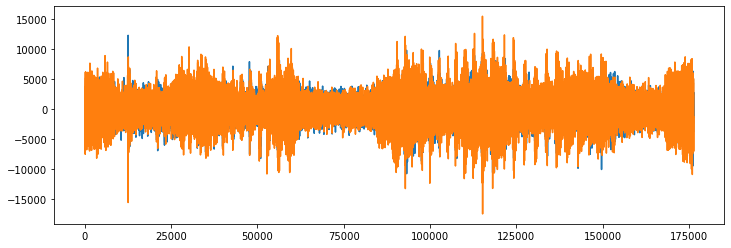

In [37]:
# For sample1
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

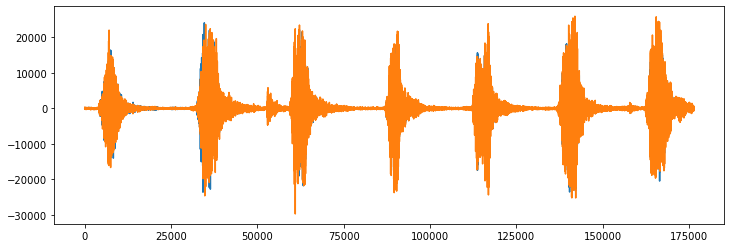

In [53]:
# For sample2
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio1)

### Reading audio file using librosa

In [39]:
# !pip install librosa

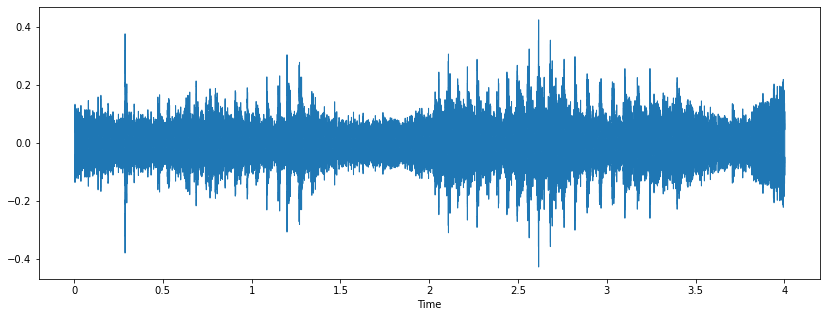

In [40]:
import librosa
import librosa.display

plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)

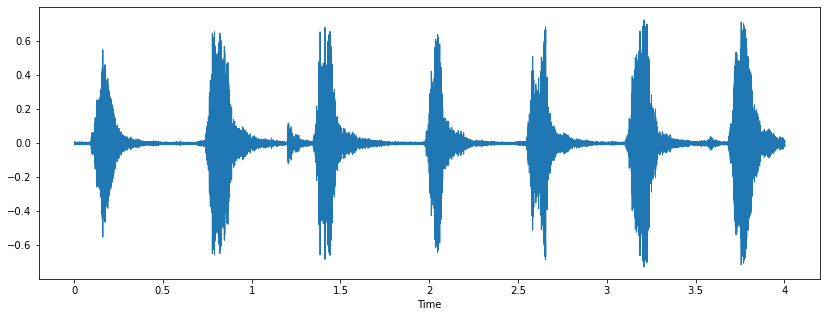

In [41]:
plt.figure(figsize=(14,5))
data1,sample_rate1=librosa.load(filename1)
librosa.display.waveshow(data1,sr=sample_rate1)

In [42]:
sample_rate

22050

In [43]:
data

array([ 0.00177266, -0.02351751, -0.03296481, ..., -0.06013541,
       -0.08471732, -0.02570445], dtype=float32)

In [44]:
sample_rate1

22050

In [45]:
data1

array([-0.00212876, -0.00206413, -0.00093926, ...,  0.01438215,
        0.01408772,  0.01304848], dtype=float32)

### Comparision using librosa and scipy

In [46]:
# Sample Rate for sample1

print('Using scipy sample rate is ',wave_sample_rate)
print('Using librosa sample rate is ',sample_rate)

Using scipy sample rate is  44100
Using librosa sample rate is  22050


In [47]:
# Sample Rate for sample2

print('Using scipy sample rate is ',wave_sample_rate1)
print('Using librosa sample rate is ',sample_rate1)

Using scipy sample rate is  44100
Using librosa sample rate is  22050


##### From above we can observe that using scipy we will be able to get original sample rate how much ever it may be, but using librosa is advantageous as it normalizes the sample rate to 22KHZ what ever the sample rate is.

In [51]:
# data for sample1

print('Using scipy audio data ')
print(wave_audio)
print('-------------------------------------')
print('Using librosa audio data ')
print(data)

Using scipy audio data 
[[-1985  2465]
 [-1765   976]
 [-1083  -532]
 ...
 [ -572 -4579]
 [ 1521 -3099]
 [ 2735 -1279]]
-------------------------------------
Using librosa audio data 
[ 0.00177266 -0.02351751 -0.03296481 ... -0.06013541 -0.08471732
 -0.02570445]


In [52]:
# data for sample2

print('Using scipy audio data ')
print(wave_audio1)
print('-------------------------------------')
print('Using librosa audio data ')
print(data1)

Using scipy audio data 
[[-135  -35]
 [-138  -37]
 [-112  -21]
 ...
 [ 253  638]
 [ 214  609]
 [ 180  553]]
-------------------------------------
Using librosa audio data 
[-0.00212876 -0.00206413 -0.00093926 ...  0.01438215  0.01408772
  0.01304848]


##### Using scipy we are able to get original audio data which is 2 channelled (audio data mono-single channel and stereo-two channels), if we use scipy need to convert from 2 channel to single channel but if we consider librosa then it automatically converts 2 channel to single channel(i.e. coverts to mono) and normalizes the data. So librosa is advantageous compared to scipy

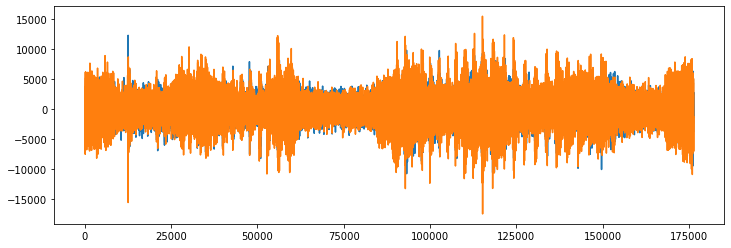

In [54]:
# Original audio with 2 channels using scipy

plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

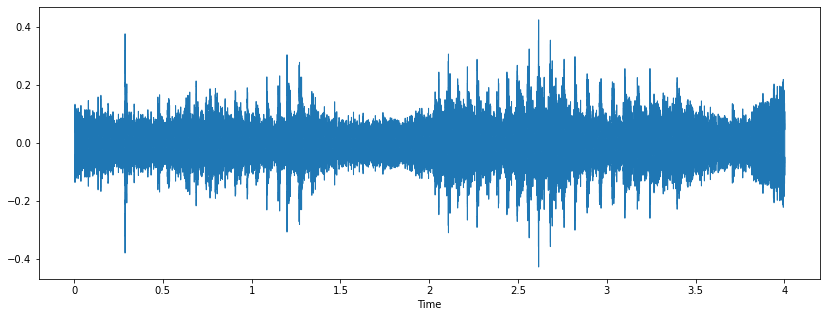

In [55]:
# Normalized audio with single channel using librosa

plt.figure(figsize=(14,5))
librosa.display.waveshow(data,sr=sample_rate)

### Checking whether audio sample data is imbalanced

In [56]:
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [57]:
metadata.shape

(8732, 8)

In [58]:
metadata.fold.value_counts()

4     990
5     936
3     925
2     888
1     873
7     838
10    837
6     823
9     816
8     806
Name: fold, dtype: int64

In [62]:
# data is mostly balanced

metadata['class'].value_counts()

air_conditioner     1000
street_music        1000
drilling            1000
engine_idling       1000
jackhammer          1000
children_playing    1000
dog_bark            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

# Preprocessing of audio data

### Extract Features using MFCC

##### Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [63]:
# For sample audio

mfcc=librosa.feature.mfcc(y=data,sr=sample_rate,n_mfcc=40)

In [64]:
mfcc

array([[-1.64234909e+02, -1.34293518e+02, -1.33656570e+02, ...,
        -9.40526657e+01, -9.93780670e+01, -1.07878334e+02],
       [ 8.41975708e+01,  8.54016724e+01,  8.65471954e+01, ...,
         5.75069122e+01,  6.10626755e+01,  5.42442703e+01],
       [-3.11164627e+01, -2.57540894e+01, -2.32799072e+01, ...,
        -1.99930210e+01, -2.45547962e+01, -1.94986706e+01],
       ...,
       [ 9.40254498e+00,  7.97712231e+00,  6.24216461e+00, ...,
         8.34592056e+00,  1.05479059e+01,  3.91647148e+00],
       [ 7.60132217e+00,  5.37763596e+00,  2.72937393e+00, ...,
         1.14884443e+01,  8.54415035e+00,  2.26631951e+00],
       [ 7.46207714e+00,  5.42380047e+00, -3.51744533e-01, ...,
         4.01581287e+00,  1.00170374e-01, -2.19577265e+00]], dtype=float32)

In [67]:
mfccs_scaled_features = np.mean(mfcc.T,axis=0)
mfccs_scaled_features 

array([-116.15642   ,   67.397736  ,  -13.408872  ,    4.772236  ,
        -12.071018  ,   -4.617154  ,  -13.909658  ,    1.3651061 ,
         -6.507204  ,    1.0026804 ,   -8.756485  ,    4.41616   ,
         -7.0558953 ,    0.5159244 ,    0.18115073,   -1.6539642 ,
         -5.2010674 ,    2.6021228 ,   -4.219912  ,    5.519374  ,
         -5.4006977 ,   -4.02984   ,   -5.5791755 ,   -6.766586  ,
         -1.8300023 ,    6.9134502 ,   -3.3798094 ,    1.9462811 ,
         -5.4448757 ,    7.6857576 ,    0.2797564 ,    0.1490212 ,
         -9.505823  ,   -4.0142326 ,   -3.2140296 ,    3.1479    ,
         -5.177817  ,    6.549643  ,    2.919447  ,    0.17459379],
      dtype=float32)

In [65]:
#### Extracting MFCC's For every audio file

audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [68]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

In [71]:
import os
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [09:34,  5.18it/s]C:\Users\HP\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
8325it [21:56,  7.68it/s]C:\Users\HP\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
8328it [21:56,  9.65it/s]C:\Users\HP\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
8732it [23:00,  6.32it/s]


In [72]:
extracted_features

[[array([-2.1818938e+02,  7.1385490e+01, -1.3149442e+02, -5.2258923e+01,
         -2.2106577e+01, -2.1909658e+01, -1.1460047e+01,  1.8722719e+01,
          6.4100842e+00,  1.4377757e+01, -1.2035480e+01,  1.9690274e+00,
         -1.7309101e+01,  9.7747087e+00, -5.8458343e+00, -1.5289924e+00,
         -1.7429775e+01,  1.0425415e+00, -4.1709471e+00,  7.3335233e+00,
         -1.1701521e+01, -7.4281230e+00,  5.4550538e+00, -2.9434781e+00,
         -5.9815207e+00, -2.3366006e-01, -3.4048653e+00,  4.3616667e+00,
         -6.0568328e+00, -5.6260595e+00,  1.0876634e+00,  6.8657212e+00,
         -2.0219477e-01,  1.6815264e+00, -5.6556239e+00, -2.8866241e+00,
          3.0454183e+00, -1.5696381e+00, -7.5472134e-01,  5.3398502e-01],
        dtype=float32),
  'dog_bark'],
 [array([-4.25052338e+02,  1.10670952e+02, -5.41928329e+01,  6.20454140e+01,
         -8.09496939e-01,  1.82500648e+01,  1.37091827e+00,  1.12450905e+01,
         -1.72693205e+00,  1.24300308e+01, -1.11215639e+01,  2.07905788e+01,

In [73]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-218.18938, 71.38549, -131.49442, -52.258923,...",dog_bark
1,"[-425.05234, 110.67095, -54.192833, 62.045414,...",children_playing
2,"[-459.82623, 122.82864, -47.908062, 53.302685,...",children_playing
3,"[-414.82184, 102.94826, -36.656853, 54.170746,...",children_playing
4,"[-447.60776, 115.08627, -53.74607, 61.553097, ...",children_playing


In [74]:
extracted_features_df.shape

(8732, 2)

In [75]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [76]:
X

array([[-218.18938   ,   71.38549   , -131.49442   , ...,   -1.5696381 ,
          -0.75472134,    0.533985  ],
       [-425.05234   ,  110.67095   ,  -54.192833  , ...,    0.63086635,
          -0.67027247,    0.5963405 ],
       [-459.82623   ,  122.82864   ,  -47.908062  , ...,    2.1942718 ,
           1.5538616 ,   -0.7991638 ],
       ...,
       [-304.84702   ,  112.69567   ,  -47.21992   , ...,   -3.0244384 ,
           2.6847005 ,    7.674591  ],
       [-345.06885   ,  126.78658   ,  -56.182545  , ...,   -7.8130603 ,
          -1.766159  ,    5.8158836 ],
       [-316.331     ,   95.86536   ,  -38.176315  , ...,    0.6094481 ,
         -11.483956  ,   -5.9417224 ]], dtype=float32)

In [77]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [78]:
# label encoding
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [79]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [93]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [94]:
X_train.shape

(6985, 40)

In [95]:
X_test.shape

(1747, 40)

In [96]:
y_train.shape

(6985, 10)

# Model

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [98]:
### No of classes =10
num_labels=y.shape[1]
num_labels

10

In [99]:
 
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [100]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               4100      
_________________________________________________________________
activation_4 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_5 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)              

In [101]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [102]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
208/219 [===========================>..] - ETA: 0s - loss: 11.0431 - accuracy: 0.1091
Epoch 00001: val_loss improved from inf to 2.29364, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 10.6614 - accuracy: 0.1087 - val_loss: 2.2936 - val_accuracy: 0.1162
Epoch 2/100
213/219 [============================>.] - ETA: 0s - loss: 2.5348 - accuracy: 0.1235
Epoch 00002: val_loss improved from 2.29364 to 2.28212, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 2.5311 - accuracy: 0.1240 - val_loss: 2.2821 - val_accuracy: 0.1156
Epoch 3/100
212/219 [============================>.] - ETA: 0s - loss: 2.3391 - accuracy: 0.1156
Epoch 00003: val_loss improved from 2.28212 to 2.27407, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 2.3385 - accuracy: 0.1165 - val_loss: 2.2741 - val_ac

210/219 [===========================>..] - ETA: 0s - loss: 1.5788 - accuracy: 0.4253
Epoch 00025: val_loss improved from 1.41834 to 1.36424, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 1.5816 - accuracy: 0.4249 - val_loss: 1.3642 - val_accuracy: 0.5409
Epoch 26/100
211/219 [===========================>..] - ETA: 0s - loss: 1.5649 - accuracy: 0.4411
Epoch 00026: val_loss improved from 1.36424 to 1.35009, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 1.5625 - accuracy: 0.4401 - val_loss: 1.3501 - val_accuracy: 0.5346
Epoch 27/100
217/219 [============================>.] - ETA: 0s - loss: 1.5103 - accuracy: 0.4676
Epoch 00027: val_loss improved from 1.35009 to 1.30310, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 1.5096 - accuracy: 0.4679 - val_loss: 1.3031 - val_accuracy: 

Epoch 51/100
212/219 [============================>.] - ETA: 0s - loss: 1.1617 - accuracy: 0.6061
Epoch 00051: val_loss improved from 0.98972 to 0.96154, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 1.1582 - accuracy: 0.6067 - val_loss: 0.9615 - val_accuracy: 0.6732
Epoch 52/100
211/219 [===========================>..] - ETA: 0s - loss: 1.1550 - accuracy: 0.6001
Epoch 00052: val_loss did not improve from 0.96154
219/219 [==============================] - 1s 6ms/step - loss: 1.1580 - accuracy: 0.5984 - val_loss: 0.9642 - val_accuracy: 0.6852
Epoch 53/100
210/219 [===========================>..] - ETA: 0s - loss: 1.1627 - accuracy: 0.6012
Epoch 00053: val_loss did not improve from 0.96154
219/219 [==============================] - 1s 5ms/step - loss: 1.1620 - accuracy: 0.6000 - val_loss: 0.9814 - val_accuracy: 0.6835
Epoch 54/100
206/219 [===========================>..] - ETA: 0s - loss: 1.1593 - accuracy: 0.6032
Ep

Epoch 78/100
216/219 [============================>.] - ETA: 0s - loss: 1.0374 - accuracy: 0.6490
Epoch 00078: val_loss improved from 0.83511 to 0.82791, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 2s 10ms/step - loss: 1.0369 - accuracy: 0.6491 - val_loss: 0.8279 - val_accuracy: 0.7361
Epoch 79/100
217/219 [============================>.] - ETA: 0s - loss: 1.0201 - accuracy: 0.6597
Epoch 00079: val_loss did not improve from 0.82791
219/219 [==============================] - 2s 8ms/step - loss: 1.0181 - accuracy: 0.6604 - val_loss: 0.8383 - val_accuracy: 0.7361
Epoch 80/100
216/219 [============================>.] - ETA: 0s - loss: 1.0252 - accuracy: 0.6594
Epoch 00080: val_loss improved from 0.82791 to 0.82245, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 2s 8ms/step - loss: 1.0265 - accuracy: 0.6591 - val_loss: 0.8224 - val_accuracy: 0.7344
Epoch 81/100
211/219 [=================

In [104]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy)

[0.78932124376297, 0.7704636454582214]


In [107]:
X_test[1]

array([-466.47324   ,    1.5016602 ,  -34.400036  ,   35.6894    ,
        -15.182923  ,  -18.883924  ,   -0.7577297 ,  -16.028217  ,
        -21.365473  ,    7.6201305 ,  -29.034492  ,  -19.153774  ,
         -2.6873178 ,   -8.493191  ,  -14.771136  ,   -7.028891  ,
         -7.116943  ,    8.86894   ,   14.91199   ,   21.457464  ,
         21.327414  ,    0.8871636 ,  -18.810375  ,   -5.0179615 ,
         -0.70585823,    2.9008536 ,   -6.7110257 ,  -16.649857  ,
         -9.831695  ,   12.847431  ,    0.6619251 ,  -23.943693  ,
        -15.194154  ,    9.193657  ,   10.399714  ,   -0.5999179 ,
         -1.2594258 ,   17.706207  ,   13.831074  ,   -5.163286  ],
      dtype=float32)

In [108]:
model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([5, 3, 4, ..., 1, 2, 2], dtype=int64)

## Testing Some Test Audio Data

### Steps

Preprocess the new audio data

predict the classes

Invere transform your Predicted Label

In [110]:
filename="street music.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features_1=mfccs_scaled_features.reshape(1,-1)

[-226.43985    130.17767    -22.857971    28.781736   -19.685198
   20.970074   -20.970945    11.193746   -15.90693      9.847527
  -14.5070305    5.918482   -15.304222     2.1580958   -9.956904
    4.3218613  -12.346973    -1.1228744   -7.0287733   -2.1237066
  -12.957638    -5.7440453   -7.4951353    0.3506535   -5.9627056
   -2.3332305   -2.8870811   -1.790086    -5.80476     -5.813209
   -7.6069427   -6.3594723   -6.431414    -4.771652    -4.9776964
   -5.291572    -4.963796    -1.2263541   -1.976036    -6.6953816]


In [111]:
mfccs_scaled_features_1

array([[-226.43985  ,  130.17767  ,  -22.857971 ,   28.781736 ,
         -19.685198 ,   20.970074 ,  -20.970945 ,   11.193746 ,
         -15.90693  ,    9.847527 ,  -14.5070305,    5.918482 ,
         -15.304222 ,    2.1580958,   -9.956904 ,    4.3218613,
         -12.346973 ,   -1.1228744,   -7.0287733,   -2.1237066,
         -12.957638 ,   -5.7440453,   -7.4951353,    0.3506535,
          -5.9627056,   -2.3332305,   -2.8870811,   -1.790086 ,
          -5.80476  ,   -5.813209 ,   -7.6069427,   -6.3594723,
          -6.431414 ,   -4.771652 ,   -4.9776964,   -5.291572 ,
          -4.963796 ,   -1.2263541,   -1.976036 ,   -6.6953816]],
      dtype=float32)

In [113]:
print(mfccs_scaled_features_1.shape)

[-226.43985    130.17767    -22.857971    28.781736   -19.685198
   20.970074   -20.970945    11.193746   -15.90693      9.847527
  -14.5070305    5.918482   -15.304222     2.1580958   -9.956904
    4.3218613  -12.346973    -1.1228744   -7.0287733   -2.1237066
  -12.957638    -5.7440453   -7.4951353    0.3506535   -5.9627056
   -2.3332305   -2.8870811   -1.790086    -5.80476     -5.813209
   -7.6069427   -6.3594723   -6.431414    -4.771652    -4.9776964
   -5.291572    -4.963796    -1.2263541   -1.976036    -6.6953816]
(1, 40)


In [115]:
predicted_label=model.predict_classes(mfccs_scaled_features_1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[9]


array(['street_music'], dtype='<U16')